In [39]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [40]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/BIOINFORMATICSII/"
model_loc = "/content/gdrive/My Drive/BIOINFORMATICSII/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['Heart_Disease_NN.ipynb', 'heart.csv']


In [41]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.
print(data.info())
print(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      1

In [43]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object
###is to ensures that the specified columns are treated as categorical data

In [44]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

<ipython-input-44-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-44-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-44-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-44-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-44-76ef3ba0124a>:3: FutureWarning: In a future version, t

In [45]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values # take target of the value
y = y.reshape(y.shape[0],1) # reshape y array into 1 dimension
x = data.drop(['target'],axis=1) #drop the  'target' in the x data
##
print(x.shape)
print(y.shape)

(303, 21)
(303, 1)


In [46]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset
data = pd.DataFrame({'A':[10,20,30], 'B':[100,200,300], 'C':[1000, 2000, 3000]})
print("Original Dataset:")
print(data)


Original Dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000


In [47]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


After applying min-max normalization to the heart dataset, all values are scaled to a range between 0 and 1. This ensures uniformity in the scale of features, facilitating better learning for machine learning algorithms.

In [48]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(169, 21)
(43, 21)
(91, 21)


In [50]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

###The first two layers are hidden layers with softmax activation, which are used for feature extraction and learning complex patterns in the data.
###The last layer is the output layer with sigmoid activation, which produces the final prediction probabilities for binary classification problems.

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                1408      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])
# The mean squared error loss function quantifies how well the model's predictions match the actual target values during training.
# The choice of loss function affects how the model learns from the data and directly impacts the optimization process.

# The Adam optimizer determines how the model's weights are updated during training to minimize the loss function.
# Learning rate (0.01 in this case) controls the step size taken during the optimization process. A larger learning rate may result
# in faster convergence but can overshoot the minimum, while a smaller learning rate may take longer to converge but may converge to a more precise minimum.
# It help determines how the model's weights are updated during training. Adam optimizer adapts the learning rate for each parameter,
# resulting in faster convergence and better performance compared to traditional gradient descent algorithms.

# The performance metrics are used to evaluate the performance of the model during training and testing.
# It provides insight into how well the model is performing during training and evaluation.

In [52]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
11/11 [==============================] - 1s 23ms/step - loss: 0.2494 - acc: 0.5207 - val_loss: 0.2509 - val_acc: 0.4884
Epoch 2/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.2473 - acc: 0.5562 - val_loss: 0.2509 - val_acc: 0.4884
Epoch 3/1000
11/11 [==============================] - 0s 6ms/step - loss: 0.2454 - acc: 0.5562 - val_loss: 0.2496 - val_acc: 0.4884
Epoch 4/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.2422 - acc: 0.5562 - val_loss: 0.2452 - val_acc: 0.4884
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.2370 - acc: 0.5562 - val_loss: 0.2390 - val_acc: 0.4884
Epoch 6/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.2284 - acc: 0.5621 - val_loss: 0.2264 - val_acc: 0.6744
Epoch 7/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.2157 - acc: 0.7337 - val_loss: 0.2131 - val_acc: 0.7907
Epoch 8/1000
11/11 [==============================] - 0s 7ms/step - loss: 0

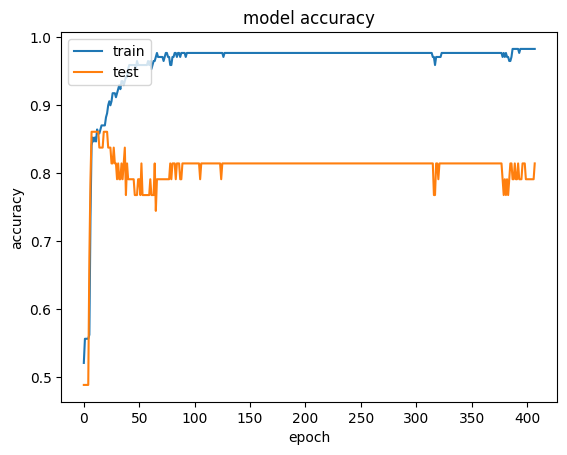

In [53]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

# The plot generated by this code represents the model's accuracy over epochs during training and validation.

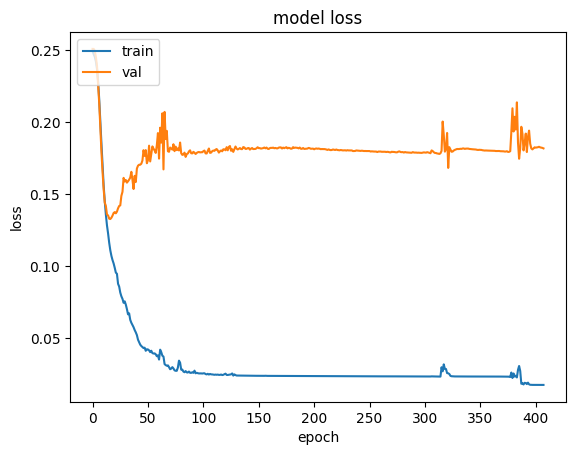

In [54]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

In [55]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

# The purpose of evaluating the model on the test dataset is to assess
# its performance and generalization ability on unseen data that was not
# used during training or validation.

3/3 [==============================] - 0s 6ms/step - loss: 0.1485 - acc: 0.8352

acc: 83.52%
loss: 0.15


In [57]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

3/3 [==============================] - 0s 4ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [1] Result: Pass
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: P

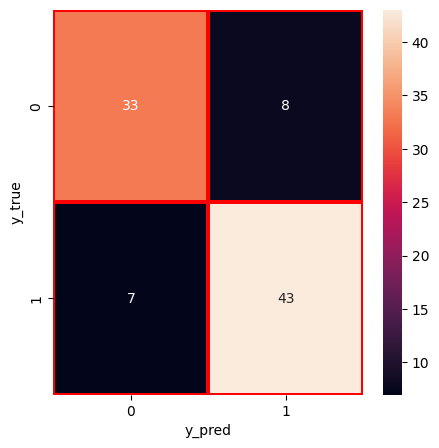


              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



In [58]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

A Confusion Matrix is a performance measurement technique for machine learning classification algorithms. It is a square matrix where the rows represent the actual classes, and the columns represent the predicted classes. Each cell in the matrix represents the count of instances where the actual class matches the predicted class.

True Positive (TP): Instances where the model correctly predicts the positive class.

False Positive (FP): Instances where the model incorrectly predicts the positive class when the actual class is negative. Also known as Type I error.

False Negative (FN): Instances where the model incorrectly predicts the negative class when the actual class is positive. Also known as Type II error.

True Negative (TN): Instances where the model correctly predicts the negative class.

For class 0:

The Precision is 0.82, which means that 82% of instances predicted as class 0 are actually class 0.

The Recall is 0.80, indicating that the model correctly identifies 80% of all actual class 0 instances.

F1-score is 0.81, which is the harmonic mean of precision and recall for class 0.

Support: 41, meaning that there are 41 instances of class 0 in the dataset.

<hr>

For class 1:

Precision is 0.84, which means that 84% of instances predicted as class 1 are actually class 1.

Recall is 0.86, indicating that the model correctly identifies 86% of all actual class 1 instances.

F1-score is 0.85, which is the harmonic mean of precision and recall for class 1.

Support is 50, meaning that there are 50 instances of class 1 in the dataset.


<hr>

Accuracy is 0.84, indicating that the overall correctness of the model's predictions is 84%.


<hr>

Macro average is 0.83, which is the average of precision, recall, and F1-score calculated independently for each class.

The weighted average precision is 0.83, recall is 0.84, and F1-score is 0.83.